# Water Quality Prediction

## Problem Statement
Develop a Machine Learning model to predict whether a water sample is potable (drinkable) or not based on various chemical and physical properties.

## Project Description
Access to clean and safe drinking water is vital for health and well-being. This project aims to build a classification model to determine if a water sample is potable, using data about water quality indicators. By identifying non-potable water, this model can serve as a valuable tool for health agencies and environmental organizations in preventing waterborne diseases.

## Dataset Information
The dataset contains several features that indicate the quality of water based on physical and chemical properties. The objective is to classify each sample as potable (safe to drink) or non-potable.

### Data Columns and Descriptions:

| Column           | Description                                                                          |
|------------------|--------------------------------------------------------------------------------------|
| `ph`             | pH level of the water, indicating acidity or alkalinity.                             |
| `Hardness`       | Amount of dissolved calcium and magnesium.                                           |
| `Solids`         | Total dissolved solids in ppm, showing mineral content.                              |
| `Chloramines`    | Concentration of chloramines (in ppm) in the water.                                  |
| `Sulfate`        | Concentration of sulfate in ppm.                                                     |
| `Conductivity`   | Water's ability to conduct electricity, related to ion levels.                       |
| `Organic_carbon` | Measure of carbon-based substances, indicating organic matter levels.                |
| `Trihalomethanes`| Level of trihalomethanes (in ppm), by-products of water chlorination.                |
| `Turbidity`      | Clarity of water, with higher values indicating more suspended particles.            |
| `Potability`     | **(Target Variable)** Indicator if water is safe to drink (1 = Potable, 0 = Not Potable). |

## Approach
1. **Data Preprocessing**: Identify and handle missing values, and scale the features to prepare the data for model training.
2. **Exploratory Data Analysis (EDA)**: Analyze data distributions and relationships between features, identifying patterns and outliers that may influence predictions.
3. **Model Training and Evaluation**: Train various classification models and evaluate their performance in predicting potability.
4. **Model Selection and Tuning**: Optimize hyperparameters of the best model to improve predictive accuracy.
5. **Final Model Evaluation**: Test the final model on unseen data and report the accuracy, precision, recall, and F1-score.
6. **Testing The Model**: Test the final model on sample data.

### Note on Accuracy
**Accuracy** is a metric that measures the proportion of correctly predicted samples to the total number of samples. In this project, accuracy indicates how well the model distinguishes potable water samples from non-potable ones.


## 1. Data Preprocessing
Convert categorical data to numerical values, handle missing values, and prepare the data for model training.

In [20]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the data

df = pd.read_csv('/content/water_potability_prediction (1).csv', header=0)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
# Handle missing values

df.isnull().sum()
df = df.fillna(df.mean())

Checking for Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 2. Exploratory Data Analysis (EDA)
Use Seaborn to visualize data distribution and relationships between features.

### Pairplot
Visualize relationships between each pair of features.

<Figure size 1500x1000 with 0 Axes>

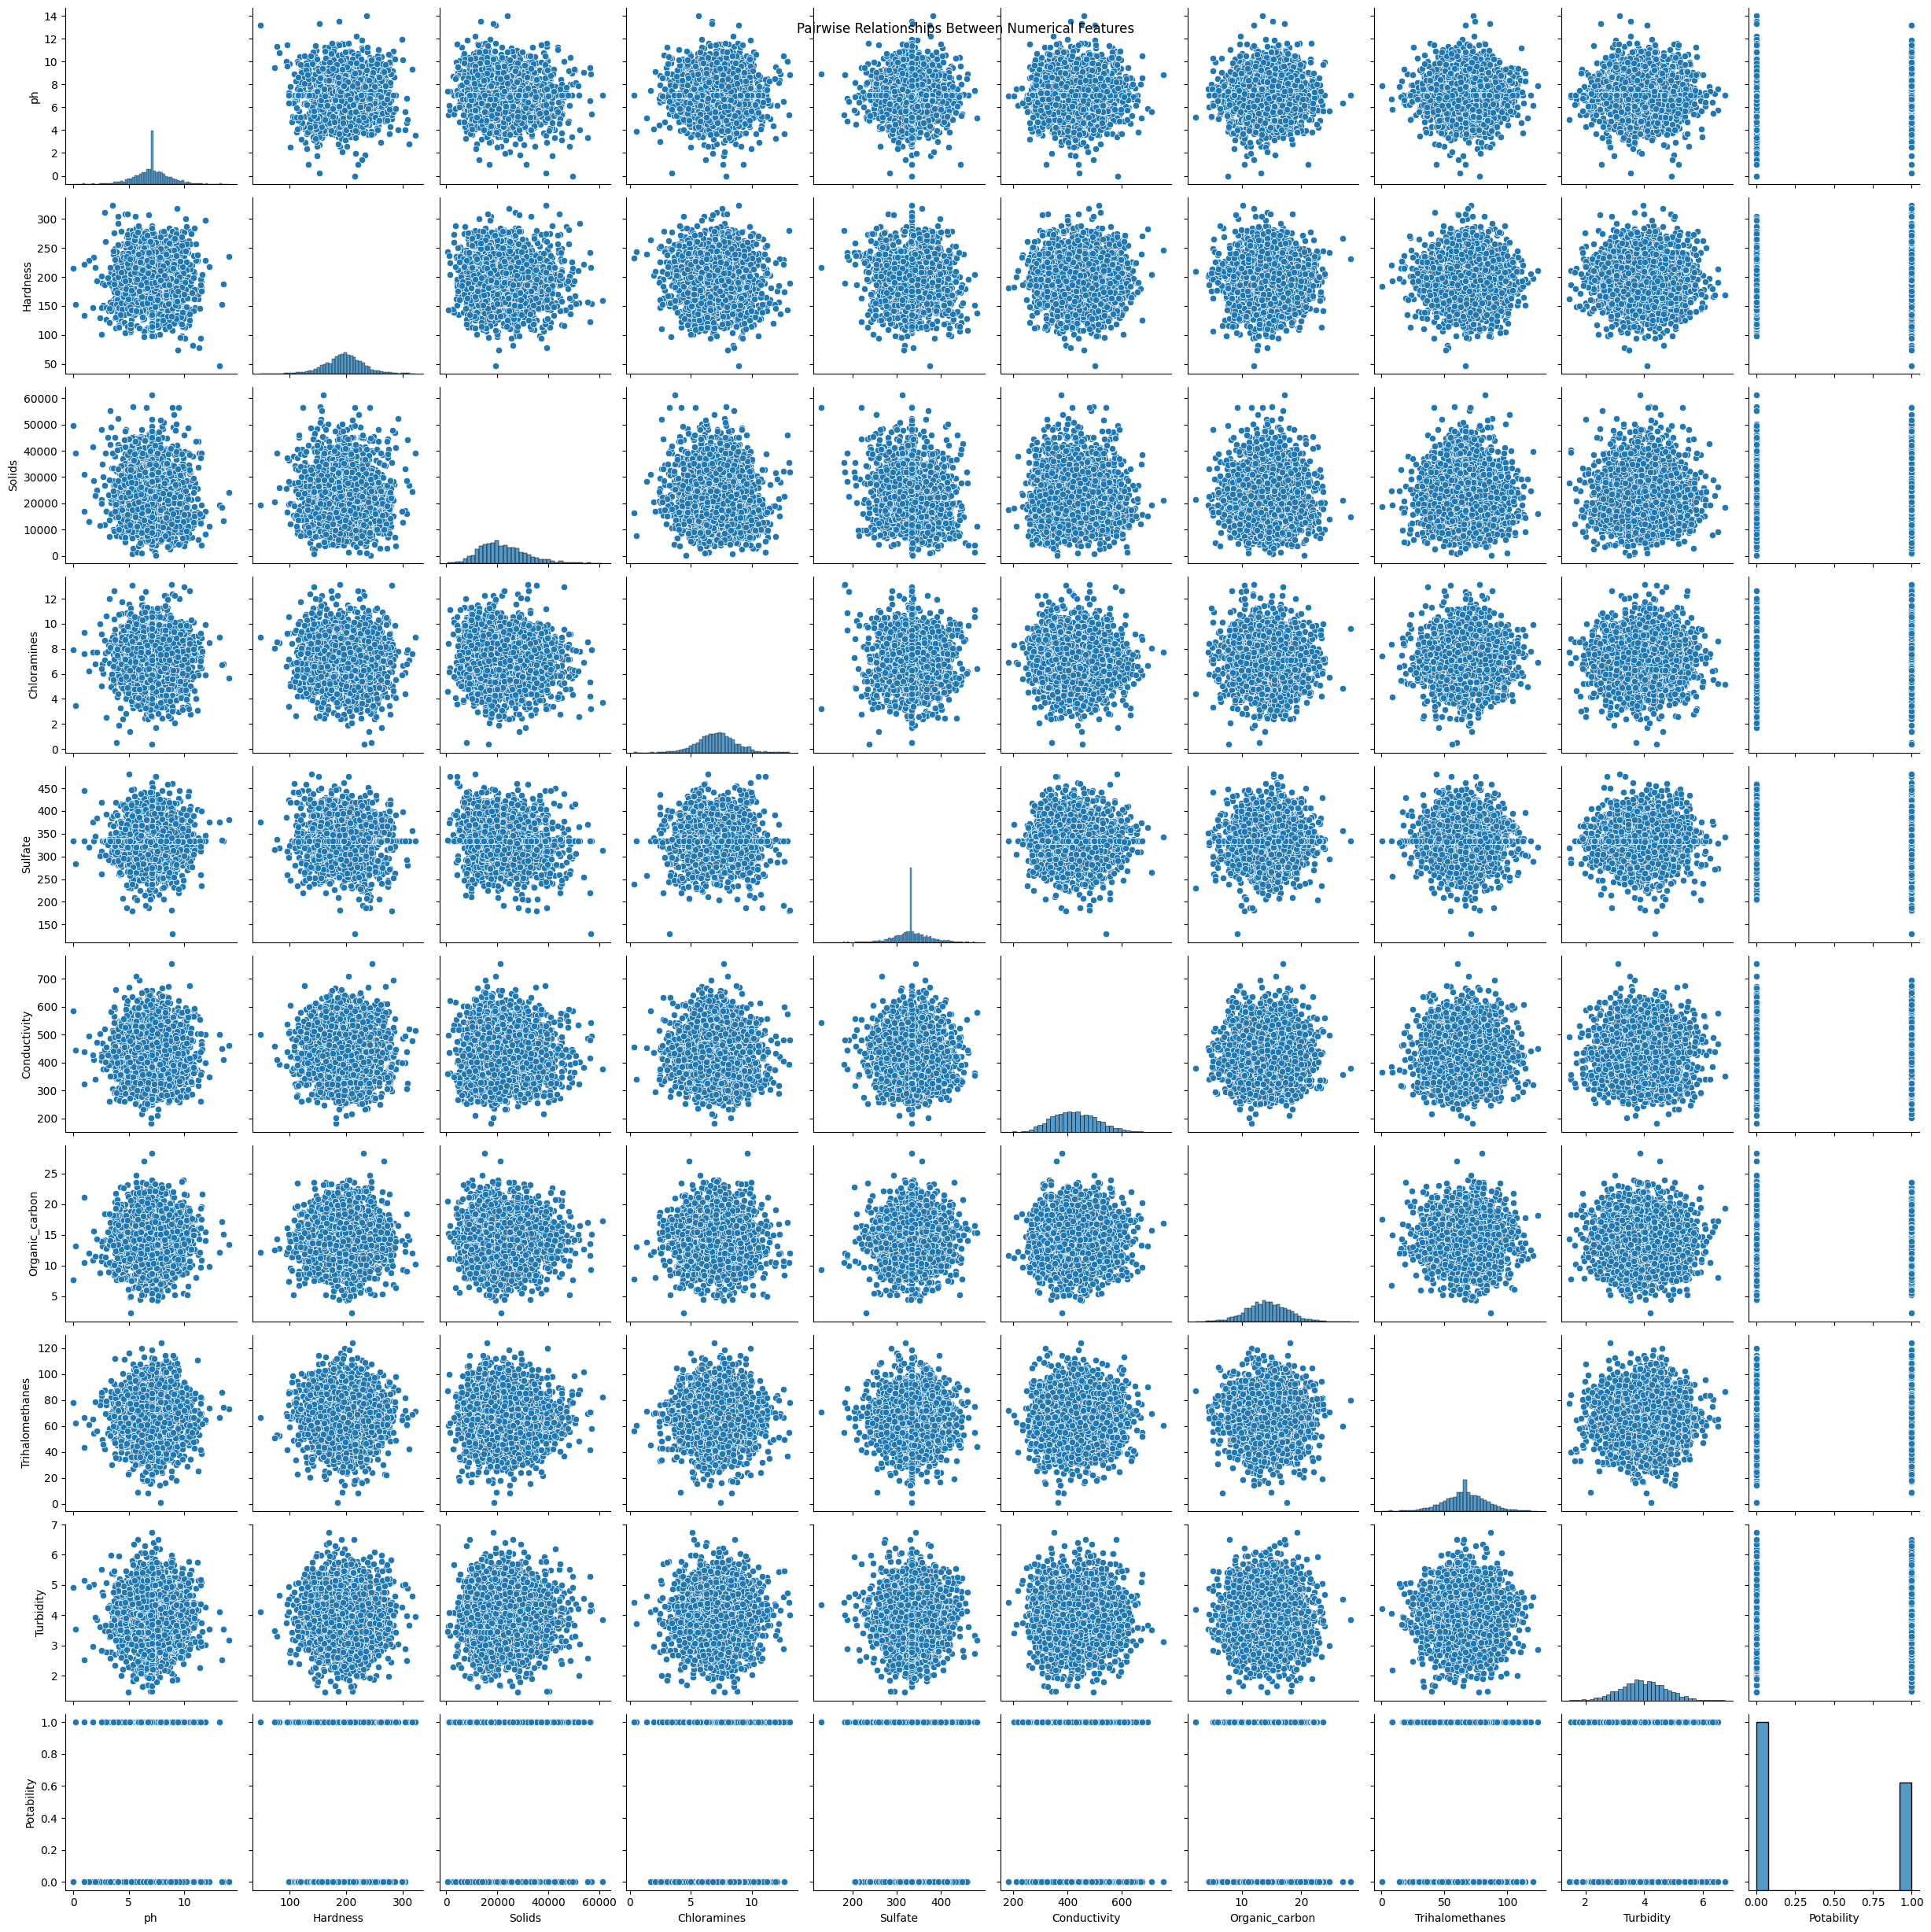

In [14]:
# Visualize the data

plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Numerical Features')
plt.show()


### Correlation Heatmap
Display correlation coefficients between features and the target variable.

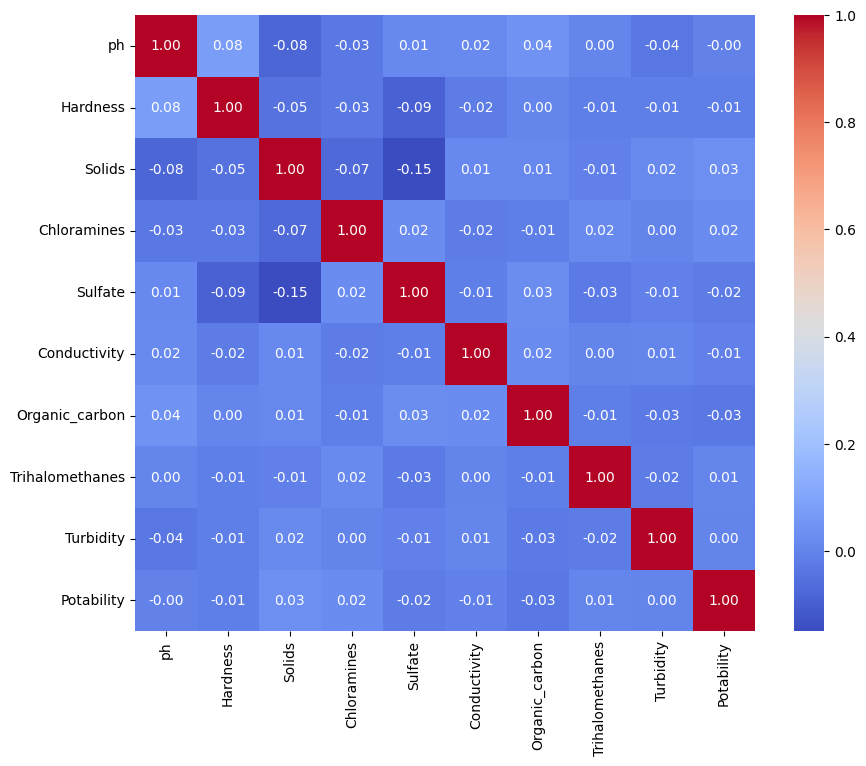

In [15]:
# Correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


### Boxplot to Identify Outliers
Identify outliers in the dataset.

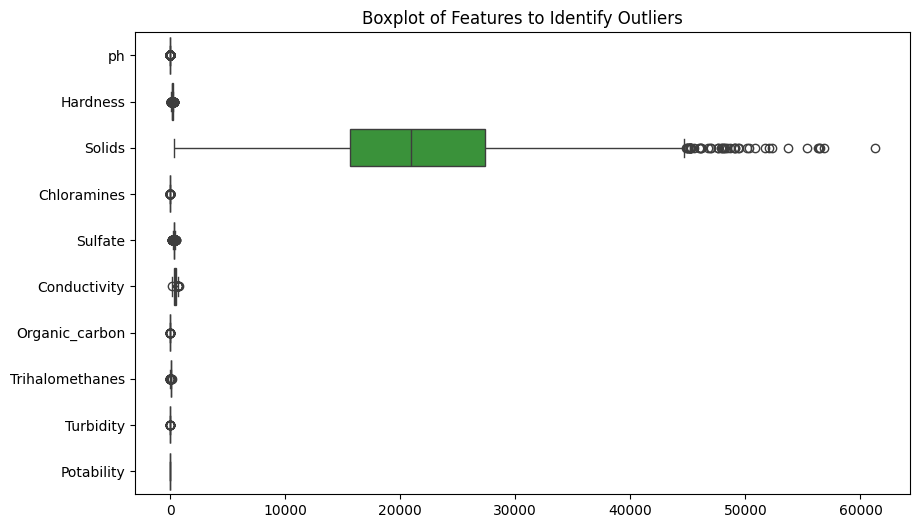

In [16]:
# Boxplot to identify outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features to Identify Outliers')
plt.show()

### Histogram plot
To observe data spread

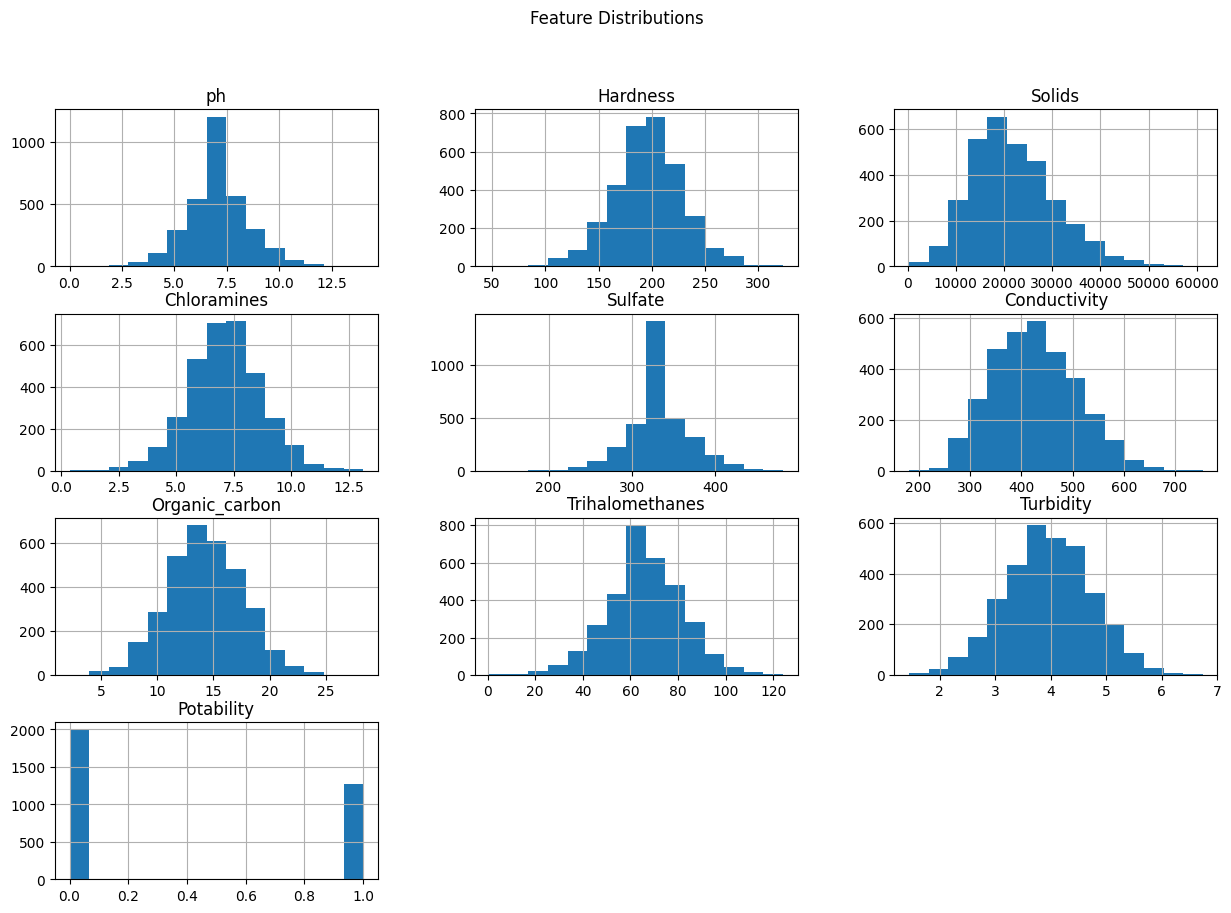

In [18]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

## 3. Model Training and Evaluation
Train multiple Classification models and evaluate their performance.

In [19]:
# Split the data into features and target

X = df.drop('Potability', axis=1)
y = df['Potability']

In [21]:
# Normalize the feature data for better model performance

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [23]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(656, 9)

In [27]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)
print()

Decision Tree Classifier:
Accuracy: 0.5777439024390244
Confusion Matrix:
[[255 157]
 [120 124]]



In [28]:
# Random Forest Classifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
print()

Random Forest Classifier:
Accuracy: 0.6783536585365854
Confusion Matrix:
[[353  59]
 [152  92]]



In [29]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:")
print(conf_matrix_gb)
print()

Gradient Boosting Classifier:
Accuracy: 0.6585365853658537
Confusion Matrix:
[[369  43]
 [181  63]]



In [30]:
# Bagging Classifier

bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_pred_bg = bagging.predict(X_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)
conf_matrix_bg = confusion_matrix(y_test, y_pred_bg)
print("Bagging Classifier:")
print("Accuracy:", accuracy_bg)
print("Confusion Matrix:")
print(conf_matrix_bg)
print()

Bagging Classifier:
Accuracy: 0.6341463414634146
Confusion Matrix:
[[340  72]
 [168  76]]



In [31]:
# K-Nearest Neighbors Classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)
print()

K-Nearest Neighbors Classifier:
Accuracy: 0.6265243902439024
Confusion Matrix:
[[311 101]
 [144 100]]



In [32]:
# Comparing Acuracy Score

print("\nModel Performance Comparison:")
print("Decision Tree Classifier - Accuracy:", accuracy_dt)
print("Random Forest Classifier - Accuracy:", accuracy_rf)
print("Gradient Boosting Classifier - Accuracy:", accuracy_gb)
print("Bagging Classifier - Accuracy:", accuracy_bg)
print("K-Nearest Neighbors Classifier - Accuracy:", accuracy_knn)


Model Performance Comparison:
Decision Tree Classifier - Accuracy: 0.5777439024390244
Random Forest Classifier - Accuracy: 0.6783536585365854
Gradient Boosting Classifier - Accuracy: 0.6585365853658537
Bagging Classifier - Accuracy: 0.6341463414634146
K-Nearest Neighbors Classifier - Accuracy: 0.6265243902439024


## 4. Model Selection and Tuning
Select the best model based on evaluation metrics and perform hyperparameter tuning.

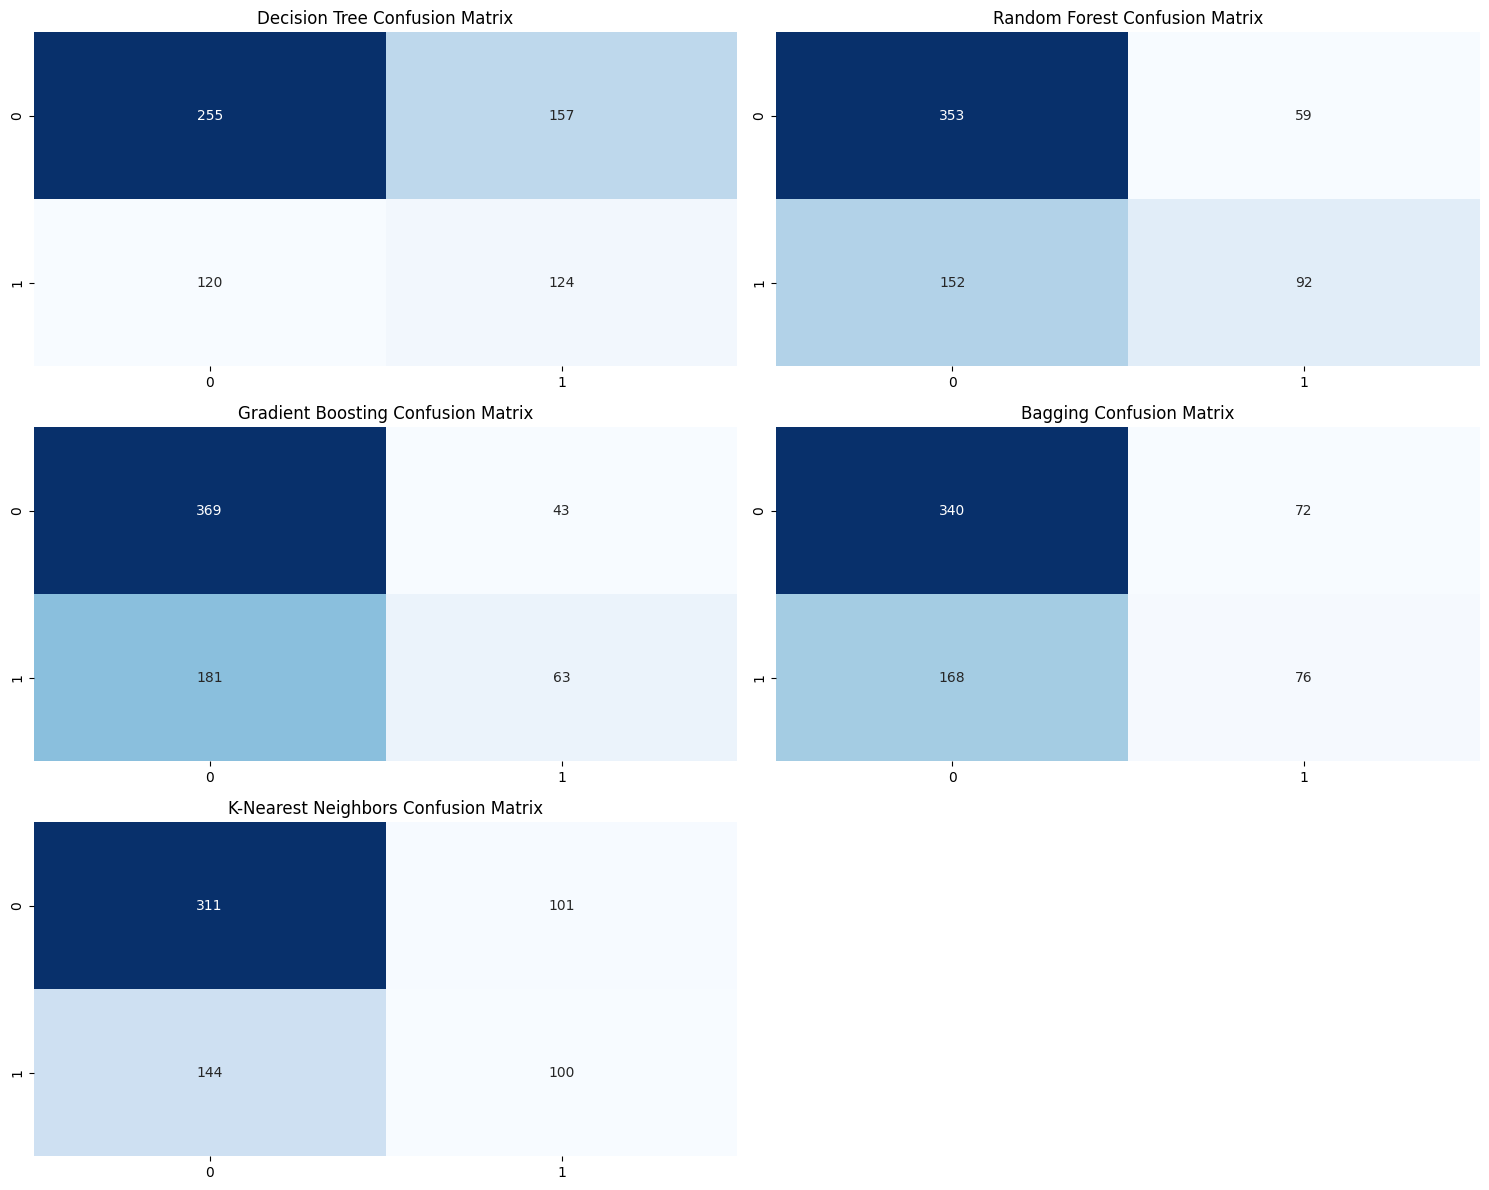

In [33]:
# Plotting confusion matrices

plt.figure(figsize=(15, 12))

#Decision Tree Confusion Matrix
plt.subplot(3, 2, 1)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")

#Random Forest Confusion Matrix
plt.subplot(3, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")

#Gradient Boosting Confusion Matrix
plt.subplot(3, 2, 3)
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Confusion Matrix")

#Bagging Confusion Matrix
plt.subplot(3, 2, 4)
sns.heatmap(conf_matrix_bg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Bagging Confusion Matrix")

#K-Nearest Neighbors Confusion Matrix
plt.subplot(3, 2, 5)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors Confusion Matrix")

plt.tight_layout()
plt.show()

In [34]:
# Select the best model based on evaluation metrics

# Create a dictionary to store model names and their accuracy scores
model_accuracy = {
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'Bagging': accuracy_bg,
    'K-Nearest Neighbors': accuracy_knn
}

# Find the model with the highest accuracy
best_model = max(model_accuracy, key=model_accuracy.get)

print(f"Best Model Name: {best_model}")

Best Model Name: Random Forest


In [35]:
# Perform hyperparameter tuning and further improvements on the selected model


# Initialize the RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid

param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

## 5. Final Model Evaluation
Evaluate the final model on the test set.

In [36]:
# Evaluate the final model

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy: 0.676829268292683


## 6. Model Testing
Predicting on Sample Input Data

In [40]:
# Sample input data
new_input_data = {
    'ph': [7.5],
    'Hardness': [150],
    'Solids': [200],
    'Chloramines': [10],
    'Sulfate': [0.2],
    'Conductivity': [4.5],
    'Organic_carbon': [20],
    'Trihalomethanes': [0.1],
    'Turbidity': [1]
}


new_input_df = pd.DataFrame(new_input_data)


new_input_scaled = scaler.transform(new_input_df)


prediction = random_forest.predict(new_input_scaled)


if prediction[0] == 1:
    print("WOW, The water is Potable! Your can drink it .")
else:
    print("Ooh NO, The water is Not Potable! You should not drink it.")


Ooh NO, The water is Not Potable! You should not drink it.
